Natural time scale: 1.02e-01
Solution is expected to be stable.


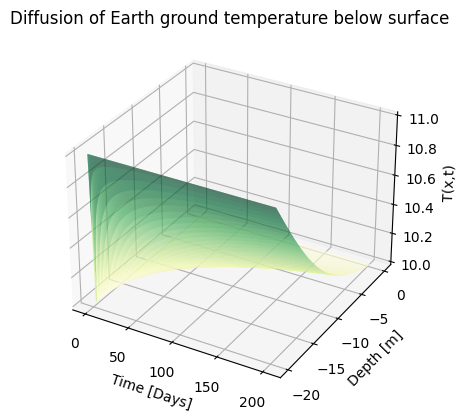

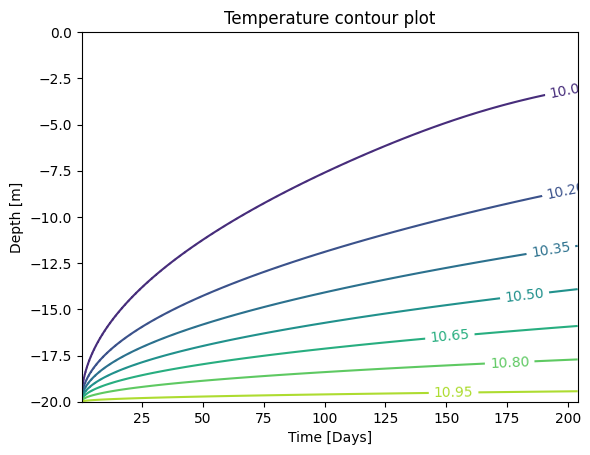

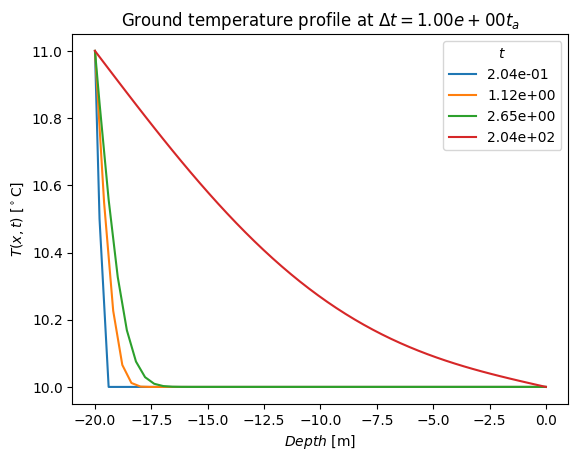

In [4]:

# Set up configuration options and special features
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# Initialize parameters (time step, grid spacing, etc.)

N = 100 # gridpoints
L = 20.0  # The system extends from x = -L/2 to L/2
h = L/(N-1)  # Grid size dx
kappa = .2 # m^2 / day  # Diffusion coefficient
t_natural = h**2/(2*kappa)
tau = t_natural # timestep
coeff = kappa*tau/h**2

print('Natural time scale: {0:.2e}'.format(h**2/(2*kappa)))

if coeff <= 0.5:
    print('Solution is expected to be stable.')
else:
    print('Warning! Solution is expected to be unstable. Consider smaller dt or larger dx.')


# Set initial and boundary conditions.
tt = 10*np.ones(N)  # Initialize temperature to be ten celsius at all points.
tt[-1] = 11.0 # Temperature contribution of the core in Celsius 

# Set up loop and plot variables.
xplot = np.arange(N)*h - L/2.0  # Record the x scale for plots
iplot = 0  # Counter used to count plots
# nstep = int(np.ceil(365/tau))  # Maximum number of iterations
nstep = 2000
nplots = nstep # Number of snapshots (plots) to take
plot_step = nstep/nplots  # Number of time steps between plots

# Loop over the desired number of time steps.
ttplot = np.empty((N, nplots))
tplot = np.empty(nplots)

## MAIN LOOP ##
for istep in range(nstep):
    # Compute new temperature using FTCS scheme. All points in space are updated at once.
    # Note that the endpoints (boundary) is not updated.
    
#     tt[0] = 10 + 12*np.sin(2*np.pi*istep*tau/365) # enforce sinusoidal bc on endpoint
    
    tt[1:N-1] = tt[1:N-1] + coeff*(tt[2:N] + tt[0:N-2] - 2*tt[1:N-1])

    # Periodically record temperature for plotting.
    if (istep + 1) % plot_step < 1:  # record data for plot every plot_step number of steps. Don't record first step.
        ttplot[:, iplot] = np.copy(tt)  # record a copy of tt(i) for plotting
        tplot[iplot] = (istep+1)*tau  # record time for plots
        iplot += 1

xplot = np.flip(xplot - 10) # enforce depth of 20

# Plot temperature versus x and t as a wire-mesh plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Tp, Xp = np.meshgrid(tplot, xplot)
ax.plot_surface(Tp, Xp, ttplot, rstride=2, cstride=2, cmap='YlGn')
ax.set_xlabel('Time [Days]')
ax.set_ylabel('Depth [m]')
ax.set_zlabel(r'T(x,t)')
ax.set_title(f'Diffusion of Earth ground temperature below surface')

# Plot temperature versus x and t as a contour plot
fig2, ax2 = plt.subplots()
ct = ax2.contour(tplot, xplot, ttplot)
ax2.clabel(ct, fmt='%1.2f')
ax2.set_xlabel('Time [Days]')
ax2.set_ylabel('Depth [m]')
ax2.set_title('Temperature contour plot')

# Plot 1D slices of the temperature distribution vs. space at short and long times
fig3, ax3 = plt.subplots()
ax3.set_title(r'Ground temperature profile at $\Delta t = {0:.2e}t_a$'.format(tau/t_natural))
# ax3.plot(xplot, ttplot[:, int(nstep//4)], 'b', label = 'Summer')
# ax3.plot(xplot, ttplot[:, int(nstep//2)], 'g', label='Spring')
# ax3.plot(xplot, ttplot[:, int(3*nstep//4)], 'm', label='Winter')
# ax3.plot(xplot, ttplot[:, -1], 'k', label='Fall')
ax3.plot(xplot, ttplot[:, 1], label='{0:.2e}'.format(tplot[1]))
ax3.plot(xplot, ttplot[:, 10], label='{0:.2e}'.format(tplot[10]))
ax3.plot(xplot, ttplot[:, 25], label='{0:.2e}'.format(tplot[25]))
ax3.plot(xplot, ttplot[:, -1], label='{0:.2e}'.format(tplot[-1]))

# ax3.legend(title= 'End of Seasons ')
ax3.legend(title=r'$t$')
ax3.set_xlabel(r'$Depth$ [m] ')
ax3.set_ylabel(r'$T(x, t)$ [$^\circ$C]')

plt.show()
